<a href="https://colab.research.google.com/github/Paecis3/ejercicio/blob/main/Copia_de_Ejercicio_2_ultima_ENCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#comenzamos  instalando las librerías que vamos a usar

import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import read_excel
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
#por ahora, vamos con esta lectura de la base, lo que hicimos fue subirla al drive, publicarla como página web
# Lo de low memory fue sugerencia del chatgpt para abrir bases con mucha info.
path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQe_pOgPxJH1lYhDDJ-V8fVdnA1RyQlw2Ev_layCQX-1VJRBdBQJzqrRkrjCFS-aBiwFXrkBcKHnoxI/pub?output=csv'

df_ENCCH = pd.read_csv (path, low_memory=False)

In [ ]:
#veo la info sobre la base
# es una base enorme, de  548  variables. No son tantos casos, 3380
df_ENCCH.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Columns: 548 entries, id to soc20
dtypes: float64(314), int64(68), object(166)
memory usage: 14.1+ MB


In [ ]:
# Miro las columnas, para definir la limpieza de las variables que no son relevantes para este trabajo.
#En un primer ejercicio, en el que trabajamos con la hipótesis de que el consumo de ficción nacional tenía relación con otros consumos culturales,
#Cuando hicimos la matriz de correlación, tuvimos como resultado que no, que sólo mostraba correlaciones con variables ligadas con diferentes cuestiones vinculadas al consumo televisivo
# En este nuevo ejercicio, entonces, nos concentramos en las variables de consumo televisivo y las de clasificación SE y nivel educativo
df_ENCCH.columns.tolist ()

['id',
 'region',
 'localidad',
 'provincia',
 'genero',
 'edad',
 'grupos_edad',
 'niv_socioe',
 'nse_3',
 'tamanio',
 'expansor',
 'ponderador',
 'tv1',
 'tv2',
 'tv2.1',
 'tv3_1',
 'tv3_2',
 'tv3_3',
 'tv3_4',
 'tv3_5',
 'tv3_6',
 'tv4',
 'tv5_1',
 'tv5_2',
 'tv5_3',
 'tv5_4',
 'tv6.1',
 'tv6.2',
 'tv7_1',
 'tv7_2',
 'tv7_3',
 'tv7_4',
 'tv7_5',
 'tv7_6',
 'tv7_7',
 'tv7_8',
 'tv7_9',
 'tv7_10',
 'tv7_11',
 'tv8.1',
 'tv8.2',
 'tv8.3',
 'tv8.4',
 'tv8.5',
 'tv9',
 'tv10',
 'tv10.1',
 'tv11_1',
 'tv11_2',
 'tv11_3',
 'tv11_4',
 'tv11_5',
 'tv11_6',
 'tv11_7',
 'tv11_8',
 'tv11_9',
 'tv11_10',
 'tv11_11',
 'tv11_12',
 'tv11_13',
 'tv11_14',
 'tv11_15',
 'tv11_16',
 'tv11_17',
 'tv11_18',
 'tv11_19',
 'tv11.1',
 'tv12_1',
 'tv12_2',
 'tv12_3',
 'tv12_4',
 'tv12_5',
 'tv12_6',
 'tv12_7',
 'tv12_8',
 'tv12_9',
 'tv12_11',
 'tv12_12',
 'tv12_13',
 'tv12_14',
 'tv12_15',
 'tv12_16',
 'tv12_17',
 'tv12_18',
 'tv12_19',
 'tv12.1',
 'tv13.1',
 'tv13.2',
 'tv13.3',
 'tv14_1',
 'tv14_2',
 'tv14

In [ ]:
#como la base tiene muchísimas variables, es más fácil seleccionar las variables con las que quiero trabajar (y no eliminar variables, como hicimos en el primer ejercicio)
#sólo dejamos algunas variables de clasificación: provincia, grupos de edad, nivel socioeconómico en su versión de tres niveles y nivel educativo del encuestado
# por otro lado, dejamos de lado variable que van a ser redundantes, como la variable filtro tv1, que discrimina quiénes ven o no tv y obviamente era con la que más correlacionaba en el ejercicio anterior
# Lista de las variables seleccionadas
variables_a_seleccionar = [
    'provincia', 'genero', 'grupos_edad', 'nse_3', 'tv3_1', 'tv3_2', 'tv3_3', 'tv3_4', 'tv3_5',
    'tv3_6', 'tv5_1', 'tv5_2', 'tv5_3', 'tv5_4', 'tv7_5', 'tv9', 'tv16', 'tv17', 'tv18_1', 'tv18_2', 'tv18_3', 'tv18_4', 'tv18_5',
    'tv18_6', 'tv19_1', 'tv19_2', 'tv19_3', 'tv19_4', 'tv19_5', 'tv19_6', 'tv19_7', 'tv19_8', 'soc13.1'
]

# Seleccionar las variables del DataFrame
df_ENCCseleccionado = df_ENCCH[variables_a_seleccionar]

# Mostrar las primeras filas del DataFrame seleccionado para verificar
print(df_ENCCseleccionado.head())

                         provincia genero   grupos_edad nse_3  tv3_1  tv3_2  \
0  Ciudad Autónoma de Buenos Aires  Varón  30 a 49 años  ABC1    0.0    1.0   
1  Ciudad Autónoma de Buenos Aires  Mujer  30 a 49 años  ABC1    NaN    NaN   
2  Ciudad Autónoma de Buenos Aires  Varón  30 a 49 años  ABC1    NaN    NaN   
3  Ciudad Autónoma de Buenos Aires  Varón  18 a 29 años  ABC1    NaN    NaN   
4  Ciudad Autónoma de Buenos Aires  Mujer  50 a 64 años  ABC1    NaN    NaN   

   tv3_3  tv3_4  tv3_5  tv3_6  ...  tv18_6  tv19_1  tv19_2  tv19_3  tv19_4  \
0    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   
1    NaN    NaN    NaN    NaN  ...     0.0     0.0     0.0     0.0     0.0   
2    NaN    NaN    NaN    NaN  ...     0.0     0.0     1.0     1.0     0.0   
3    NaN    NaN    NaN    NaN  ...     0.0     0.0     0.0     1.0     0.0   
4    NaN    NaN    NaN    NaN  ...     NaN     NaN     NaN     NaN     NaN   

  tv19_5 tv19_6 tv19_7  tv19_8                   soc13.1

In [ ]:
#Ahora tenenmos una base de 33 variables. La variable objetivo es TV17, que corresponde a la pregunta: ¿Con qué frecuencia miró películas o series argentinas?
# Pido una descripción de la base
df_ENCCseleccionado.describe()

,tv3_1,tv3_2,tv3_3,tv3_4,tv3_5,tv3_6,tv5_1,tv5_2,tv5_3,tv5_4,...,tv18_5,tv18_6,tv19_1,tv19_2,tv19_3,tv19_4,tv19_5,tv19_6,tv19_7,tv19_8
count,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,3033.000000,...,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,0.112430,0.749093,0.107814,0.036597,0.018134,0.001978,0.989449,0.098582,0.031322,0.153314,...,0.133600,0.119165,0.039619,0.290848,0.551597,0.054668,0.013206,0.043919,0.134828,0.764742
std,0.315947,0.433606,0.310197,0.187802,0.133457,0.044441,0.102190,0.298149,0.174216,0.360349,...,0.340274,0.324032,0.195093,0.454223,0.497407,0.227367,0.114175,0.204946,0.341592,0.424225
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#hago una primera descripción de nulos

# Calcular la cantidad de valores nulos por columna
nulos_por_columna = df_ENCCseleccionado.isnull().sum()

# Calcular el porcentaje de valores nulos por columna
porcentaje_nulos_por_columna = (nulos_por_columna / len(df_ENCCseleccionado)) * 100

# Crear un DataFrame para mostrar la información
nulos_y_porcentajes = pd.DataFrame({
    'Nulos': nulos_por_columna,
    'Porcentaje Nulos (%)': porcentaje_nulos_por_columna
})

# Mostrar el DataFrame con la información de nulos
print(nulos_y_porcentajes)

#esos nulos correspoden a tres tipos de casos, siempre ligados a los pases del cuestionario
# los que tienen 124 casos es porque corresponde a celdas vacias de quienes no miran tv
# la que tiene 347 corresponden a la variables sobre el tipo de señal que utilizan en el hogar y al dispositivo con el que miran television
#la que tienen el 37% de casos nulos corresponde a la variable sobre las razones para elegir películas o series. La decisión por ahora es dejarla porque creemos que es importante

             Nulos  Porcentaje Nulos (%)
provincia        0              0.000000
genero           0              0.000000
grupos_edad      0              0.000000
nse_3            0              0.000000
tv3_1          347             10.266272
tv3_2          347             10.266272
tv3_3          347             10.266272
tv3_4          347             10.266272
tv3_5          347             10.266272
tv3_6          347             10.266272
tv5_1          347             10.266272
tv5_2          347             10.266272
tv5_3          347             10.266272
tv5_4          347             10.266272
tv7_5          347             10.266272
tv9              0              0.000000
tv16          1258             37.218935
tv17           124              3.668639
tv18_1         124              3.668639
tv18_2         124              3.668639
tv18_3         124              3.668639
tv18_4         124              3.668639
tv18_5         124              3.668639
tv18_6         1

In [ ]:
# Ahora comienzo a transformar las variables categóricas en numéricas
# Primero hago una lista de esas variables
categorical_vars = df_ENCCseleccionado.select_dtypes(include=['object', 'category']).columns.tolist()

print("Variables categóricas:")
print(categorical_vars)

Variables categóricas:
['provincia', 'genero', 'grupos_edad', 'nse_3', 'tv9', 'tv16', 'tv17', 'soc13.1']


In [ ]:
#Vamos transformando en la misma variable todas las categóricas
# Verificar los valores únicos en la columna 'genero'
categorias_genero = df_ENCCseleccionado['genero'].unique()
print(categorias_genero)



['Varón' 'Mujer' 'No binario']


In [ ]:
# Paso 1: Obtener las categorías únicas de la columna 'genero'
categorias_genero = df_ENCCseleccionado['genero'].unique()

# Paso 1.1: Crear el diccionario de códigos de la variable 'genero'
diccionario_codigos_genero = {i: categoria for i, categoria in enumerate(categorias_genero, 1)}

# Paso 2: Crear el diccionario de mapeo automáticamente
diccionario_mapeo_genero = {categoria: i for i, categoria in enumerate(categorias_genero, 1)}

# Mostrar el diccionario de mapeo
print("Diccionario de mapeo generado:", diccionario_mapeo_genero)

# Mostrar el diccionario de códigos
print("Diccionario de códigos generado:", diccionario_codigos_genero)

# Paso 3: Recodificar la columna 'genero'. El .loc es una sugerencia del chat para que funcione esta base y no haga una copia no deseada
df_ENCCseleccionado.loc[:, 'genero'] = df_ENCCseleccionado['genero'].replace(diccionario_mapeo_genero)

# Verificar el resultado
print(df_ENCCseleccionado.head())


Diccionario de mapeo generado: {'Varón': 1, 'Mujer': 2, 'No binario': 3}
Diccionario de códigos generado: {1: 'Varón', 2: 'Mujer', 3: 'No binario'}
                         provincia genero   grupos_edad nse_3  tv3_1  tv3_2  \
0  Ciudad Autónoma de Buenos Aires      1  30 a 49 años  ABC1    0.0    1.0   
1  Ciudad Autónoma de Buenos Aires      2  30 a 49 años  ABC1    NaN    NaN   
2  Ciudad Autónoma de Buenos Aires      1  30 a 49 años  ABC1    NaN    NaN   
3  Ciudad Autónoma de Buenos Aires      1  18 a 29 años  ABC1    NaN    NaN   
4  Ciudad Autónoma de Buenos Aires      2  50 a 64 años  ABC1    NaN    NaN   

   tv3_3  tv3_4  tv3_5  tv3_6  ...  tv18_6  tv19_1  tv19_2  tv19_3  tv19_4  \
0    0.0    0.0    0.0    0.0  ...     0.0     0.0     0.0     0.0     0.0   
1    NaN    NaN    NaN    NaN  ...     0.0     0.0     0.0     0.0     0.0   
2    NaN    NaN    NaN    NaN  ...     0.0     0.0     1.0     1.0     0.0   
3    NaN    NaN    NaN    NaN  ...     0.0     0.0     0.0     1.

In [ ]:
#recodifico la variable provincia en la misma variable
# Definir el diccionario de mapeo
diccionario_mapeo = {
    'Ciudad Autónoma de Buenos Aires': 1,
    'Buenos Aires': 2,
    'Córdoba': 3,
    'Entre Ríos': 4,
    'Santa Fe': 5,
    'Santiago del Estero': 6,
    'Mendoza': 7,
    'San Juan': 8,
    'San Luis': 9,
    'Chaco': 10,
    'Corrientes': 11,
    'Formosa': 12,
    'Misiones': 13,
    'Catamarca': 14,
    'Jujuy': 15,
    'La Rioja': 16,
    'Salta': 17,
    'Tucumán': 18,
    'Chubut': 19,
    'La Pampa': 20,
    'Neuquén': 21,
    'Río Negro': 22,
    'Santa Cruz': 23,
    'Tierra del Fuego': 24
}

# Crear el diccionario de códigos invertido
diccionario_codigos = {v: k for k, v in diccionario_mapeo.items()}

# Recodificar la variable 'provincia' en el DataFrame original
df_ENCCseleccionado.loc[:, 'provincia'] = df_ENCCseleccionado['provincia'].replace(diccionario_mapeo)

# Mostrar el DataFrame después de recodificar 'provincia'
print("\nDataFrame después de recodificar 'provincia':")
print(df_ENCCseleccionado.head())

# Mostrar el diccionario de códigos generado
print("\nDiccionario de códigos generado:")
print(diccionario_codigos)

# Mostrar valores únicos de 'provincia'
valores_unicos_provincia = df_ENCCseleccionado["provincia"].unique()
print("\nValores únicos de la columna 'provincia':")
print(valores_unicos_provincia)



DataFrame después de recodificar 'provincia':
  provincia genero   grupos_edad nse_3  tv3_1  tv3_2  tv3_3  tv3_4  tv3_5  \
0         1      1  30 a 49 años  ABC1    0.0    1.0    0.0    0.0    0.0   
1         1      2  30 a 49 años  ABC1    NaN    NaN    NaN    NaN    NaN   
2         1      1  30 a 49 años  ABC1    NaN    NaN    NaN    NaN    NaN   
3         1      1  18 a 29 años  ABC1    NaN    NaN    NaN    NaN    NaN   
4         1      2  50 a 64 años  ABC1    NaN    NaN    NaN    NaN    NaN   

   tv3_6  ...  tv18_6  tv19_1  tv19_2  tv19_3  tv19_4 tv19_5 tv19_6 tv19_7  \
0    0.0  ...     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
1    NaN  ...     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
2    NaN  ...     0.0     0.0     1.0     1.0     0.0    0.0    0.0    0.0   
3    NaN  ...     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
4    NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN   

   tv19_8            

In [ ]:
# Recodifico en la misma variable nse_3
# Paso 1: Obtener las categorías únicas de la columna 'nse_3'
categorias_nse = df_ENCCseleccionado['nse_3'].unique()

# Paso 2: Crear el diccionario de mapeo automáticamente
diccionario_mapeo_nse = {categoria: i for i, categoria in enumerate(categorias_nse, 1)}

# Mostrar el diccionario de mapeo
print("Diccionario de mapeo generado:", diccionario_mapeo_nse)

# Paso 3: Recodificar la columna 'nse_3' usando el diccionario de mapeo correctamente
df_ENCCseleccionado.loc[:, 'nse_3'] = df_ENCCseleccionado['nse_3'].map(diccionario_mapeo_nse)

# Verificar el resultado
print(df_ENCCseleccionado.head())


Diccionario de mapeo generado: {'ABC1': 1, 'C2+C3': 2, 'D1+D2+E': 3}
  provincia genero   grupos_edad nse_3  tv3_1  tv3_2  tv3_3  tv3_4  tv3_5  \
0         1      1  30 a 49 años     1    0.0    1.0    0.0    0.0    0.0   
1         1      2  30 a 49 años     1    NaN    NaN    NaN    NaN    NaN   
2         1      1  30 a 49 años     1    NaN    NaN    NaN    NaN    NaN   
3         1      1  18 a 29 años     1    NaN    NaN    NaN    NaN    NaN   
4         1      2  50 a 64 años     1    NaN    NaN    NaN    NaN    NaN   

   tv3_6  ...  tv18_6  tv19_1  tv19_2  tv19_3  tv19_4 tv19_5 tv19_6 tv19_7  \
0    0.0  ...     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
1    NaN  ...     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
2    NaN  ...     0.0     0.0     1.0     1.0     0.0    0.0    0.0    0.0   
3    NaN  ...     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
4    NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN   


In [ ]:
# como no quiero que retome las mismas categorías para el diccionario de código, lo armamos por separado
diccionario_codigos_nse = {
    1: 'Alto',
    2: 'Medio',
    3: 'Bajo'
}

# Mostrar el diccionario de códigos
print("Diccionario de códigos para 'nse_3':", diccionario_codigos_nse)


# Verificar el resultado
print(df_ENCCseleccionado.head())



Diccionario de códigos para 'nse_3': {1: 'Alto', 2: 'Medio', 3: 'Bajo'}
  provincia genero   grupos_edad nse_3  tv3_1  tv3_2  tv3_3  tv3_4  tv3_5  \
0         1      1  30 a 49 años     1    0.0    1.0    0.0    0.0    0.0   
1         1      2  30 a 49 años     1    NaN    NaN    NaN    NaN    NaN   
2         1      1  30 a 49 años     1    NaN    NaN    NaN    NaN    NaN   
3         1      1  18 a 29 años     1    NaN    NaN    NaN    NaN    NaN   
4         1      2  50 a 64 años     1    NaN    NaN    NaN    NaN    NaN   

   tv3_6  ...  tv18_6  tv19_1  tv19_2  tv19_3  tv19_4 tv19_5 tv19_6 tv19_7  \
0    0.0  ...     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
1    NaN  ...     0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0   
2    NaN  ...     0.0     0.0     1.0     1.0     0.0    0.0    0.0    0.0   
3    NaN  ...     0.0     0.0     0.0     1.0     0.0    0.0    0.0    0.0   
4    NaN  ...     NaN     NaN     NaN     NaN     NaN    NaN    NaN    NaN 

In [ ]:
#recodifico en la misma variable tv16, esta variable corresponde a la pregunta sobre las razones para elegir un contenido audiovisual
# Extraer los valores únicos de la columna 'tv16'
valores_unicos_tv16 = df_ENCCseleccionado['tv16'].unique()

# Crear el diccionario de mapeo para 'tv16', asignando valores numéricos que empiezan desde 1
diccionario_mapeo_tv16 = {valor: idx + 1 for idx, valor in enumerate(valores_unicos_tv16)}

# Crear el diccionario de códigos invertido para 'tv16'
diccionario_codigos_tv16 = {idx + 1: valor for idx, valor in enumerate(valores_unicos_tv16)}

# Imprimir el diccionario de mapeo y el diccionario de códigos para confirmar
print("Diccionario de mapeo para 'tv16':", diccionario_mapeo_tv16)
print("Diccionario de códigos para 'tv16':", diccionario_codigos_tv16)

#Aplicar el diccionario de mapeo a la columna 'tv16'
df_ENCCseleccionado.loc[:, 'tv16'] = df_ENCCseleccionado['tv16'].map(diccionario_mapeo_tv16)

# Verificar los cambios
print(df_ENCCseleccionado.head())


Diccionario de mapeo para 'tv16': {'La eligió en el momento': 1, 'Vio una publicidad/ avance': 2, 'Continuar la saga/ siguiente temporada': 3, nan: 4, 'Recomendación de amigos o familiares': 5, 'Por los actores': 6, 'Se la sugirió la plataforma': 7, 'La mencionaron en los medios': 8, 'Comentarios en redes sociales': 9, 'Por el género': 10, 'La recomendó un docente': 11, 'Por el director/a': 12, '96': 13, 'Ns/Nc': 14, 'Por la trama': 15, 'La vio en otras oportunidades': 16, 'Por la duración/ era corta': 17, 'Por interés/ gusto': 18, 'La recomendó un influencer': 19, 'Para entretenerme/ despejarme': 20}
Diccionario de códigos para 'tv16': {1: 'La eligió en el momento', 2: 'Vio una publicidad/ avance', 3: 'Continuar la saga/ siguiente temporada', 4: nan, 5: 'Recomendación de amigos o familiares', 6: 'Por los actores', 7: 'Se la sugirió la plataforma', 8: 'La mencionaron en los medios', 9: 'Comentarios en redes sociales', 10: 'Por el género', 11: 'La recomendó un docente', 12: 'Por el dire

In [ ]:
#saco los valores unicos de la variable grupos_edad
valores_unicos_grupos_edad = df_ENCCseleccionado['grupos_edad'].unique()
print(valores_unicos_grupos_edad)



['30 a 49 años' '18 a 29 años' '50 a 64 años' '65 años y mas'
 '13 a 17 años']


In [ ]:
# Crear un diccionario de mapeo con los códigos proporcionados para 'grupos_edad'
diccionario_mapeo_grupos_edad = {
    '13 a 17 años': 1,
    '18 a 29 años': 2,
    '30 a 49 años': 3,
    '50 a 64 años': 4,
    '65 años y mas': 5
}

# Imprimir el diccionario de mapeo para confirmar
print("Diccionario de mapeo para 'grupos_edad':", diccionario_mapeo_grupos_edad)

# Aplicar el diccionario de mapeo a la columna 'grupos_edad'
# Recodificar la columna 'grupos_edad' en la misma variable
df_ENCCseleccionado.loc[:,'grupos_edad'] = df_ENCCseleccionado['grupos_edad'].replace(diccionario_mapeo_grupos_edad)


Diccionario de mapeo para 'grupos_edad': {'13 a 17 años': 1, '18 a 29 años': 2, '30 a 49 años': 3, '50 a 64 años': 4, '65 años y mas': 5}


In [ ]:
# Extraer los valores únicos de la columna 'soc13.1', que pregunta por el nivel educativo del encuestado
valores_unicos_soc131 = df_ENCCseleccionado['soc13.1'].unique()

# Crear el diccionario de mapeo para 'soc13.1', asignando valores numéricos que empiezan desde 1
diccionario_mapeo_soc131 = {valor: idx + 1 for idx, valor in enumerate(valores_unicos_soc131)}

# Crear el diccionario de códigos invertido para 'soc13.1'
diccionario_codigos_soc131 = {idx + 1: valor for idx, valor in enumerate(valores_unicos_soc131)}

# Imprimir el diccionario de mapeo y el diccionario de códigos para confirmar
print("Diccionario de mapeo para 'soc13.1':", diccionario_mapeo_soc131)
print("Diccionario de códigos para 'soc13.1':", diccionario_codigos_soc131)

# Aplicar el diccionario de mapeo a la columna 'soc13.1'
df_ENCCseleccionado.loc[:, 'soc13.1'] = df_ENCCseleccionado['soc13.1'].map(diccionario_mapeo_soc131)

# Verificar los cambios
print(df_ENCCseleccionado.head())

Diccionario de mapeo para 'soc13.1': {'Universitarios Completos': 1, 'Terciarios Completos': 2, 'Secundarios Completos': 3, 'Posgrado': 4, 'Universitarios Incompletos': 5, 'Terciarios Incompletos': 6, 'Primarios Completos': 7, 'Secundarios Incompletos': 8, 'Primarios Incompletos': 9, 'Sin Estudios': 10, 'Ns Nc': 11}
Diccionario de códigos para 'soc13.1': {1: 'Universitarios Completos', 2: 'Terciarios Completos', 3: 'Secundarios Completos', 4: 'Posgrado', 5: 'Universitarios Incompletos', 6: 'Terciarios Incompletos', 7: 'Primarios Completos', 8: 'Secundarios Incompletos', 9: 'Primarios Incompletos', 10: 'Sin Estudios', 11: 'Ns Nc'}
  provincia genero grupos_edad nse_3  tv3_1  tv3_2  tv3_3  tv3_4  tv3_5  \
0         1      1           3     1    0.0    1.0    0.0    0.0    0.0   
1         1      2           3     1    NaN    NaN    NaN    NaN    NaN   
2         1      1           3     1    NaN    NaN    NaN    NaN    NaN   
3         1      1           2     1    NaN    NaN    NaN    N

In [ ]:
# Extraer los valores únicos de la columna 'tv9', que pregunta si en el último año miró plataformas OTT
valores_unicos_tv9 = df_ENCCseleccionado['tv9'].unique()

# Crear el diccionario de mapeo, asignando valores numéricos que empiezan desde 1
diccionario_mapeo_tv9 = {valor: idx + 1 for idx, valor in enumerate(valores_unicos_tv9)}

# Crear el diccionario de códigos invertido para 'tv9'
# Recodificar la columna 'tv9' en la misma variable
df_ENCCseleccionado.loc[:,'tv9'] = df_ENCCseleccionado['tv9'].replace({'SI': 1, 'NO': 0})

# Verificar los cambios en 'tv9' con valores únicos
print(df_ENCCseleccionado["tv9"].unique())


[1 0]


In [ ]:
#me falta la variable objetivo, tv17
valores_unicos_tv17 = df_ENCCseleccionado['tv17'].unique()
print("Valores únicos en 'tv17':", valores_unicos_tv17)



Valores únicos en 'tv17': ['Algunas veces a la semana' 'Algunas veces al año' 'Algunas veces al mes'
 nan 'Nunca' 'Todos o casi todos los días' 'Ns/Nc']


In [ ]:
# Como quiero unificar categorías, hago un procedimiento diferente:
# Con un diccionario de recodificación: aqui en la recodificación fusiono categorías para que queden 3
diccionario_recodificacion = {
    'Algunas veces a la semana': 1,
    'Todos o casi todos los días': 1,
    'Algunas veces al año': 2,
    'Algunas veces al mes': 2,
    'Nunca': 0,
    'Ns/Nc': 0,
    np.nan: np.nan
}

# Aplicar la recodificación a la columna 'tv17'
df_ENCCseleccionado.loc[:,'tv17'] = df_ENCCseleccionado['tv17'].map(diccionario_recodificacion)

print(df_ENCCseleccionado)

     provincia genero grupos_edad nse_3  tv3_1  tv3_2  tv3_3  tv3_4  tv3_5  \
0            1      1           3     1    0.0    1.0    0.0    0.0    0.0   
1            1      2           3     1    NaN    NaN    NaN    NaN    NaN   
2            1      1           3     1    NaN    NaN    NaN    NaN    NaN   
3            1      1           2     1    NaN    NaN    NaN    NaN    NaN   
4            1      2           4     1    NaN    NaN    NaN    NaN    NaN   
...        ...    ...         ...   ...    ...    ...    ...    ...    ...   
3375        24      2           2     2    0.0    1.0    0.0    0.0    0.0   
3376        24      2           5     2    0.0    1.0    0.0    0.0    0.0   
3377        24      2           3     2    0.0    1.0    0.0    0.0    0.0   
3378        24      1           2     2    0.0    1.0    0.0    0.0    0.0   
3379        24      2           2     2    0.0    1.0    0.0    0.0    0.0   

      tv3_6  ...  tv18_6  tv19_1  tv19_2  tv19_3  tv19_4 tv19_5

In [ ]:
print(df_ENCCseleccionado['tv17'].unique())

[1.0 2.0 nan 0.0]


In [ ]:
# Definir el diccionario de recodificación
diccionario_recodificacion_tv17 = {
    1: 'Frecuentemente',
    2: 'A veces',
    0: 'Nunca'
}
#veo como queda el diccionario
print(diccionario_recodificacion_tv17)

{1: 'Frecuentemente', 2: 'A veces', 0: 'Nunca'}


In [ ]:
#Empiezo a trabajar sobre casos nulos:
print(df_ENCCseleccionado.isnull().sum())

df_ENCCseleccionado.isnull().sum()/len(df_ENCCH)*100


provincia        0
genero           0
grupos_edad      0
nse_3            0
tv3_1          347
tv3_2          347
tv3_3          347
tv3_4          347
tv3_5          347
tv3_6          347
tv5_1          347
tv5_2          347
tv5_3          347
tv5_4          347
tv7_5          347
tv9              0
tv16             0
tv17           124
tv18_1         124
tv18_2         124
tv18_3         124
tv18_4         124
tv18_5         124
tv18_6         124
tv19_1         124
tv19_2         124
tv19_3         124
tv19_4         124
tv19_5         124
tv19_6         124
tv19_7         124
tv19_8         124
soc13.1          0
dtype: int64


,0
provincia,0.000000
genero,0.000000
grupos_edad,0.000000
nse_3,0.000000
tv3_1,10.266272
tv3_2,10.266272
tv3_3,10.266272
tv3_4,10.266272
tv3_5,10.266272
tv3_6,10.266272


In [ ]:
#los casos nulos corresponden a los pases del cuestionario. Son nulos xq las celdas están vacías.
#en las variables con 124 nulos, corresponde a quienes no miran TV, no nos parece que se sumen en el cálculo del modelo

#comienzo eliminando nulos de mi variable objetivo, son los casos que NO ven TV.
#Para eso, selecciono la variable objetivo, que tiene los mismos nulos y la utilizo como criterio para limpiar la base

# Elimina las filas donde la columna 'tv17' tenga valores nulos
df_ENCCseleccionado_limpio = df_ENCCseleccionado.dropna(subset=['tv17'])

# Mostrar el resultado
df_ENCCseleccionado_limpio

#quedan 3256 casos


,provincia,genero,grupos_edad,nse_3,tv3_1,tv3_2,tv3_3,tv3_4,tv3_5,tv3_6,...,tv18_6,tv19_1,tv19_2,tv19_3,tv19_4,tv19_5,tv19_6,tv19_7,tv19_8,soc13.1
0,1,1,3,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,1,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
5,1,1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,24,2,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3
3376,24,2,5,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8
3377,24,2,3,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
3378,24,1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8


In [ ]:
print(df_ENCCseleccionado_limpio.isnull().sum())



provincia        0
genero           0
grupos_edad      0
nse_3            0
tv3_1          223
tv3_2          223
tv3_3          223
tv3_4          223
tv3_5          223
tv3_6          223
tv5_1          223
tv5_2          223
tv5_3          223
tv5_4          223
tv7_5          223
tv9              0
tv16             0
tv17             0
tv18_1           0
tv18_2           0
tv18_3           0
tv18_4           0
tv18_5           0
tv18_6           0
tv19_1           0
tv19_2           0
tv19_3           0
tv19_4           0
tv19_5           0
tv19_6           0
tv19_7           0
tv19_8           0
soc13.1          0
dtype: int64


In [ ]:
#PARA ASIGNAR NULOS: de los métodos consultados, asignarlos por la media no corresponde porque son variables categóricas
# tampoco por media o mediana, que si bien son más pertinentes para variables categóricas y para variables numéricas enteras, ya que no mantiene las proporciones cuando tiene más de dos categorías
#entonces, busco una manera por la cual se mantengan las proporciones dentro de las categorías
#tengo dos modos en que aparecen los nulos, NaN y nan, así que primero unifico el modo en que aparecen
# Función para imputar nulos (NaN, nan) con proporciones de las categorías
def impute_with_proportions(series):
    # Calcula las proporciones de las categorías no nulas
    proportions = series.value_counts(normalize=True, dropna=True)

    # Si la columna tiene todos los valores nulos, no podemos imputar
    if len(proportions) == 0:
        return series  # Devolver la serie tal cual (mantiene los NaN)

    # Imputa los valores nulos (NaN, nan) usando estas proporciones
    return series.apply(
        lambda x: np.random.choice(proportions.index, p=proportions.values) if pd.isnull(x) else x
    )

# Aplica la función a todas las columnas categóricas de df_ENCCseleccionado
df_ENCCseleccionado_limpio = df_ENCCseleccionado.apply(
    lambda col: impute_with_proportions(col) if col.isnull().any() else col
)

# Verifica si hay nulos restantes
print(df_ENCCseleccionado_limpio.isnull().sum())

provincia      0
genero         0
grupos_edad    0
nse_3          0
tv3_1          0
tv3_2          0
tv3_3          0
tv3_4          0
tv3_5          0
tv3_6          0
tv5_1          0
tv5_2          0
tv5_3          0
tv5_4          0
tv7_5          0
tv9            0
tv16           0
tv17           0
tv18_1         0
tv18_2         0
tv18_3         0
tv18_4         0
tv18_5         0
tv18_6         0
tv19_1         0
tv19_2         0
tv19_3         0
tv19_4         0
tv19_5         0
tv19_6         0
tv19_7         0
tv19_8         0
soc13.1        0
dtype: int64


In [ ]:
df_ENCCseleccionado_limpio

,provincia,genero,grupos_edad,nse_3,tv3_1,tv3_2,tv3_3,tv3_4,tv3_5,tv3_6,...,tv18_6,tv19_1,tv19_2,tv19_3,tv19_4,tv19_5,tv19_6,tv19_7,tv19_8,soc13.1
0,1,1,3,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,1,2,3,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
2,1,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3
3,1,1,2,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,1,2,4,1,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,24,2,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3
3376,24,2,5,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8
3377,24,2,3,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
3378,24,1,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,8


In [ ]:
#veo que tipo de variables tengo

df_ENCCseleccionado_limpio.dtypes

,0
provincia,object
genero,object
grupos_edad,object
nse_3,object
tv3_1,float64
tv3_2,float64
tv3_3,float64
tv3_4,float64
tv3_5,float64
tv3_6,float64


In [ ]:
# Convertir todas las columnas que aún son tipo object y float a tipo numérico
df_ENCCseleccionado_limpio = df_ENCCseleccionado_limpio.apply(
    lambda col: pd.to_numeric(col, errors='coerce').astype('Int64') if col.dtype in ['float64', 'object'] else col
)

# Verifica el tipo de datos de las columnas después de la conversión
print(df_ENCCseleccionado_limpio.dtypes)

provincia      Int64
genero         Int64
grupos_edad    Int64
nse_3          Int64
tv3_1          Int64
tv3_2          Int64
tv3_3          Int64
tv3_4          Int64
tv3_5          Int64
tv3_6          Int64
tv5_1          Int64
tv5_2          Int64
tv5_3          Int64
tv5_4          Int64
tv7_5          Int64
tv9            Int64
tv16           Int64
tv17           Int64
tv18_1         Int64
tv18_2         Int64
tv18_3         Int64
tv18_4         Int64
tv18_5         Int64
tv18_6         Int64
tv19_1         Int64
tv19_2         Int64
tv19_3         Int64
tv19_4         Int64
tv19_5         Int64
tv19_6         Int64
tv19_7         Int64
tv19_8         Int64
soc13.1        Int64
dtype: object


In [ ]:
#miro como quedo la base
df_ENCCseleccionado_limpio.head()

,provincia,genero,grupos_edad,nse_3,tv3_1,tv3_2,tv3_3,tv3_4,tv3_5,tv3_6,...,tv18_6,tv19_1,tv19_2,tv19_3,tv19_4,tv19_5,tv19_6,tv19_7,tv19_8,soc13.1
0,1,1,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,2,3,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,1,1,3,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,3
3,1,1,2,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,2,4,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [ ]:
#avanzamos con el modelo
#miramos los datos de mi variable objetivo
print(df_ENCCseleccionado_limpio["tv17"].unique())


<IntegerArray>
[1, 2, 0]
Length: 3, dtype: Int64


In [ ]:
#vemos cuales son las asociaciones significativas
#para que funcione tengo que hacer que todas las variables esten codificadas y sean numericas


correlaciones = df_ENCCseleccionado_limpio.corr()['tv17']

print(correlaciones)

provincia      0.004182
genero         0.023680
grupos_edad    0.010166
nse_3         -0.108986
tv3_1         -0.011440
tv3_2         -0.000957
tv3_3          0.003569
tv3_4          0.021691
tv3_5          0.008664
tv3_6         -0.016568
tv5_1          0.000445
tv5_2          0.056585
tv5_3          0.024280
tv5_4          0.011041
tv7_5          0.093881
tv9            0.155330
tv16           0.000904
tv17           1.000000
tv18_1         0.005342
tv18_2         0.083819
tv18_3         0.040535
tv18_4         0.018276
tv18_5        -0.007994
tv18_6        -0.018684
tv19_1         0.021554
tv19_2         0.014169
tv19_3         0.044967
tv19_4         0.001946
tv19_5         0.031568
tv19_6        -0.015230
tv19_7         0.042460
tv19_8         0.032040
soc13.1       -0.145015
Name: tv17, dtype: float64


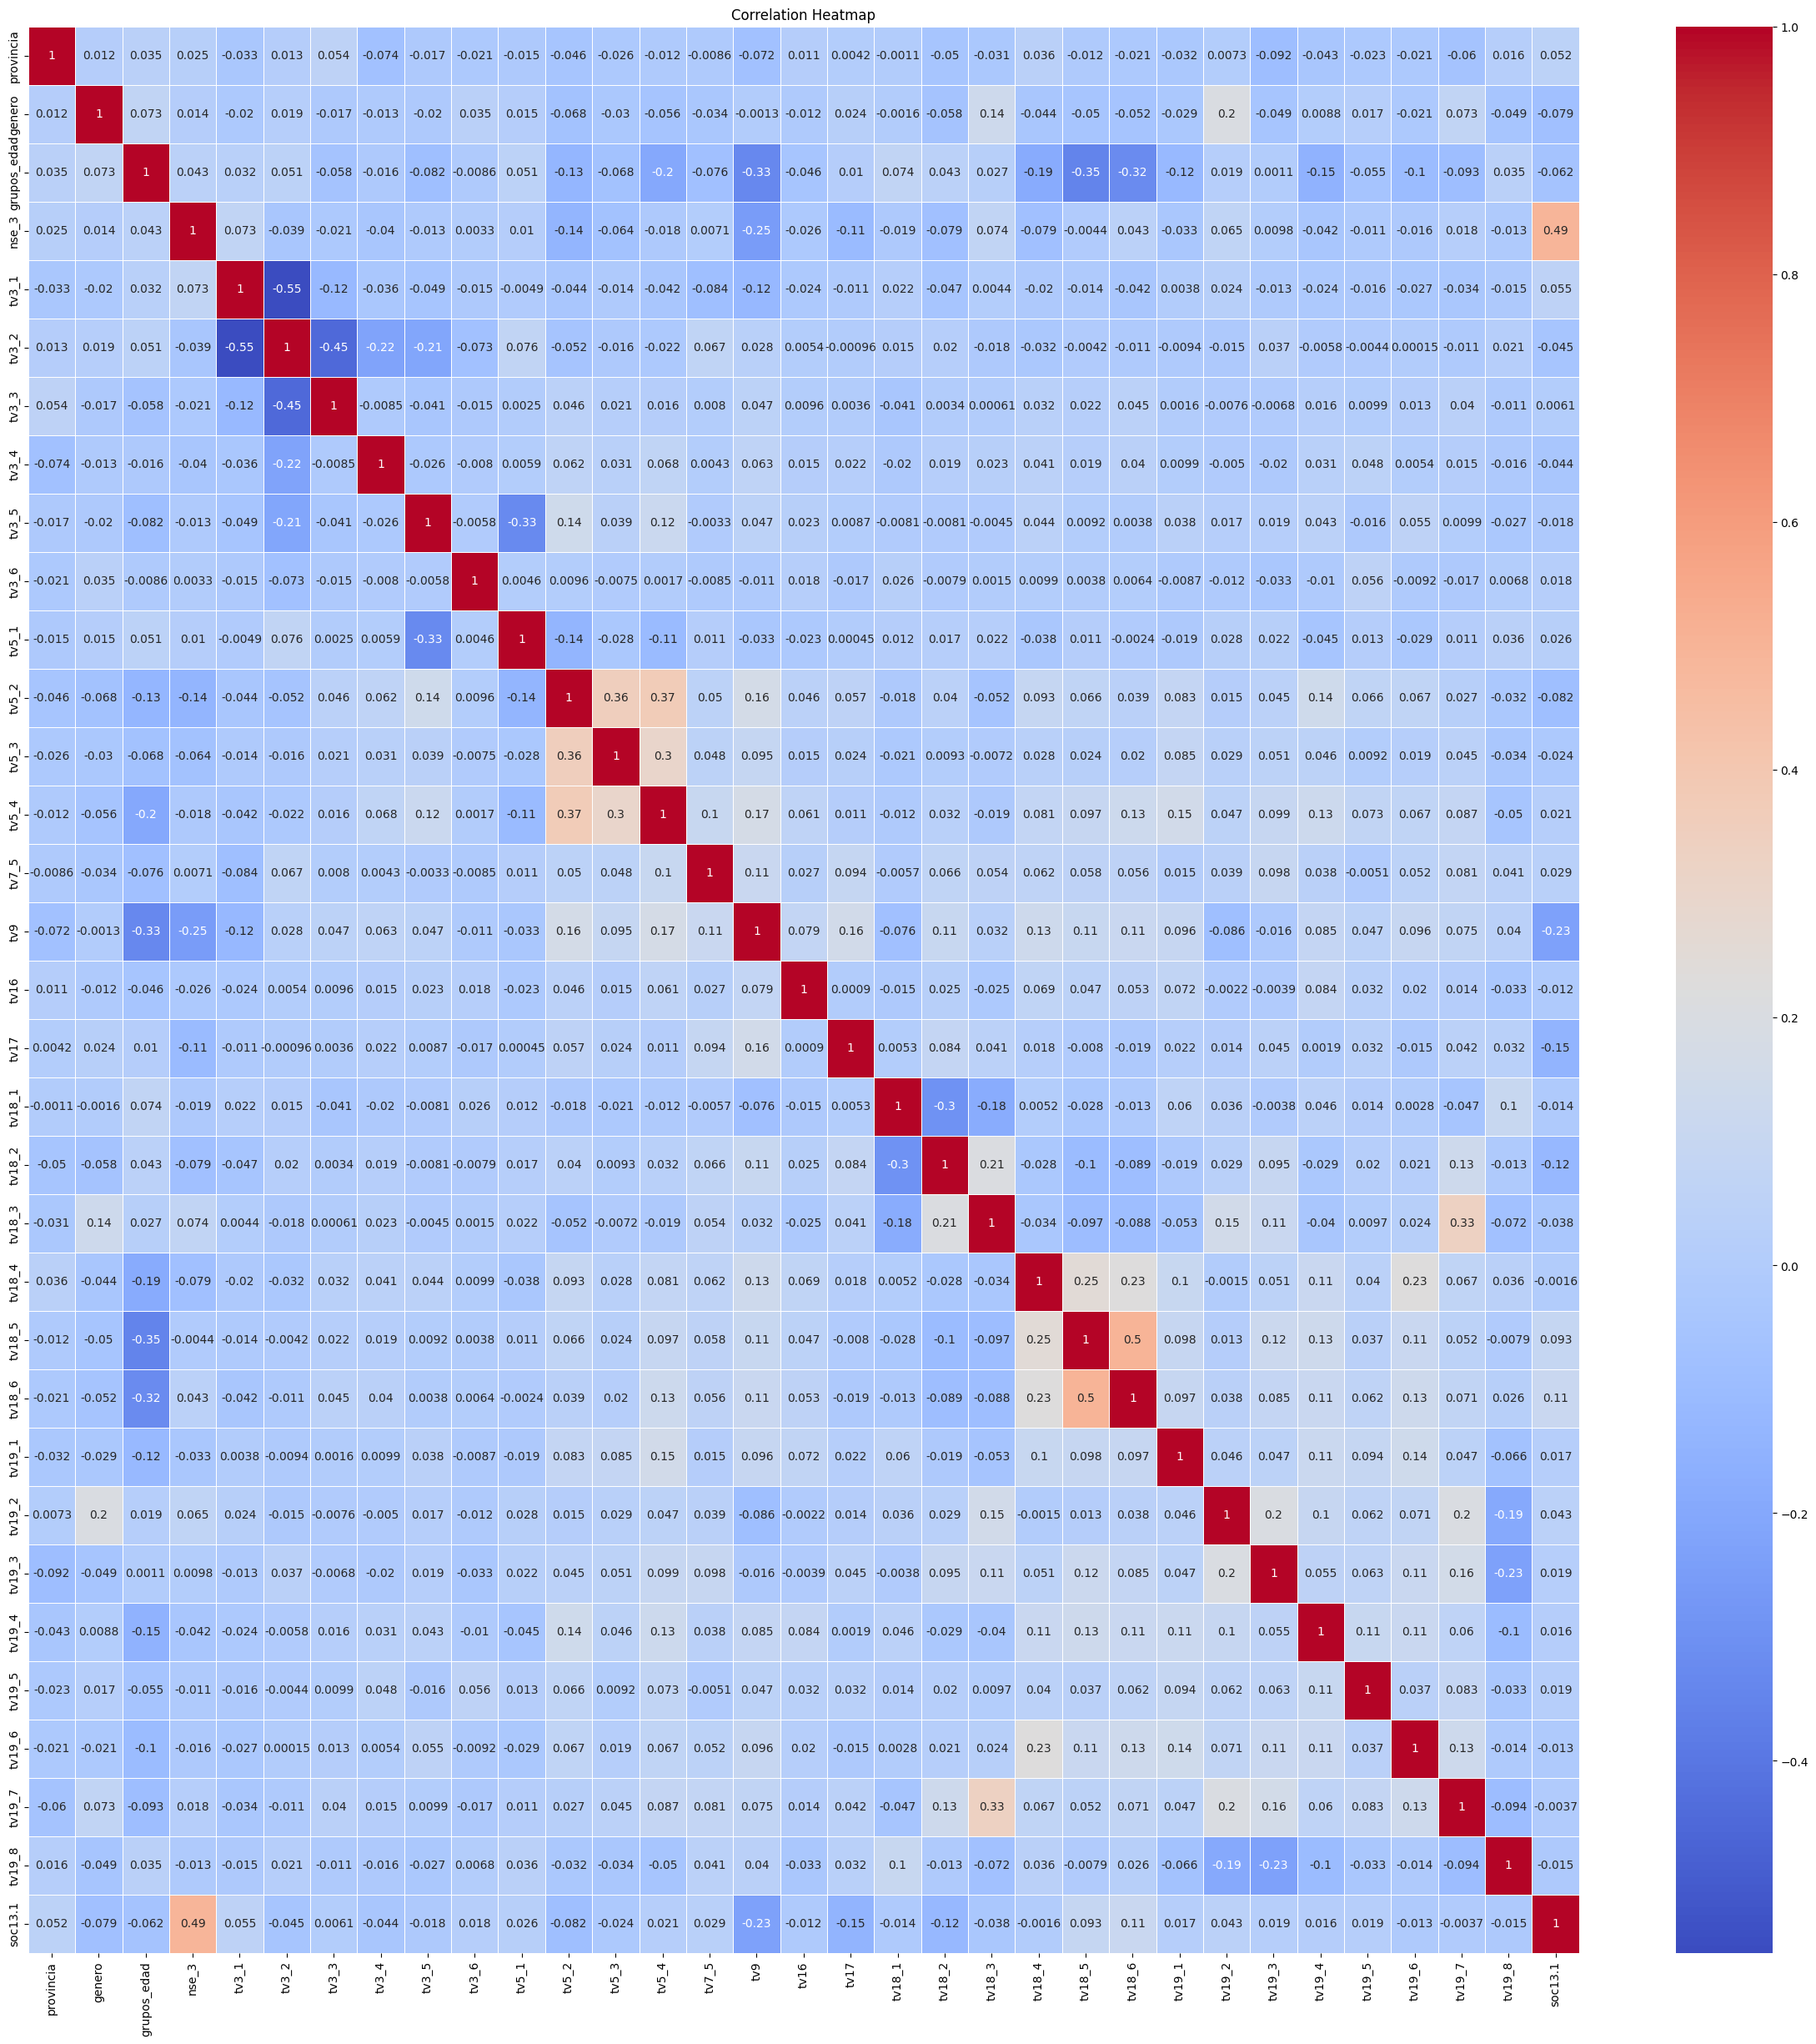

In [ ]:
#armamos un mapa de calor para visualizar asociaciones significativas
import matplotlib.pyplot as plt
import seaborn as sns
# Configurar el tamaño de la figura
plt.figure(figsize=(30, 30))

# Crear el mapa de calor de correlación
sns.heatmap(df_ENCCseleccionado_limpio.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Añadir título
plt.title('Correlation Heatmap')

# Mostrar el mapa de calor
plt.show()

In [ ]:
#filtramos las variables con correlacion significativa
feature_selection = correlaciones[abs(correlaciones) > 0.1].index
print (feature_selection)

Index(['nse_3', 'tv9', 'tv17', 'soc13.1'], dtype='object')


In [ ]:
# Filtro con las columnas que tienen una correlación entre 0.1 y 1 y -0.1 y -1 para armar la base de datos del modelo

feature_selection = correlaciones[((correlaciones > 0.1) & (correlaciones <= 1)) | ((correlaciones < -0.1) & (correlaciones >= -1))].index

# Imprimir las columnas seleccionadas
print("Columnas con correlación entre 0.1 y 1 o entre -0.1 y -1:")
print(feature_selection)
print(feature_selection.shape)

#las variables que tienen correlacion con mirar ficcion nacional son:
#edad, nivel socioeconómico, uso de plataformas ott y nivel educativo del encuestado


Columnas con correlación entre 0.1 y 1 o entre -0.1 y -1:
Index(['nse_3', 'tv9', 'tv17', 'soc13.1'], dtype='object')
(4,)


In [ ]:
#creamos unq nueva base de datos con las variables con correlacion significtiva
# Crear la nueva base de datos con las variables seleccionadas y la variable objetivo 'tv17'
df_ENCCseleccionado_features = df_ENCCseleccionado_limpio[feature_selection]

# Añadir la variable objetivo 'tv17' si no está en feature_selection
if 'tv17' not in df_ENCCseleccionado_features.columns:
    df_ENCCseleccionado_features['tv17'] = df_ENCCseleccionado_limpio['tv17']

# Verificar las primeras filas de la nueva base de datos
print(df_ENCCseleccionado_features.head())


   nse_3  tv9  tv17  soc13.1
0      1    1     1        1
1      1    1     2        2
2      1    1     2        3
3      1    1     2        1
4      1    0     1        1


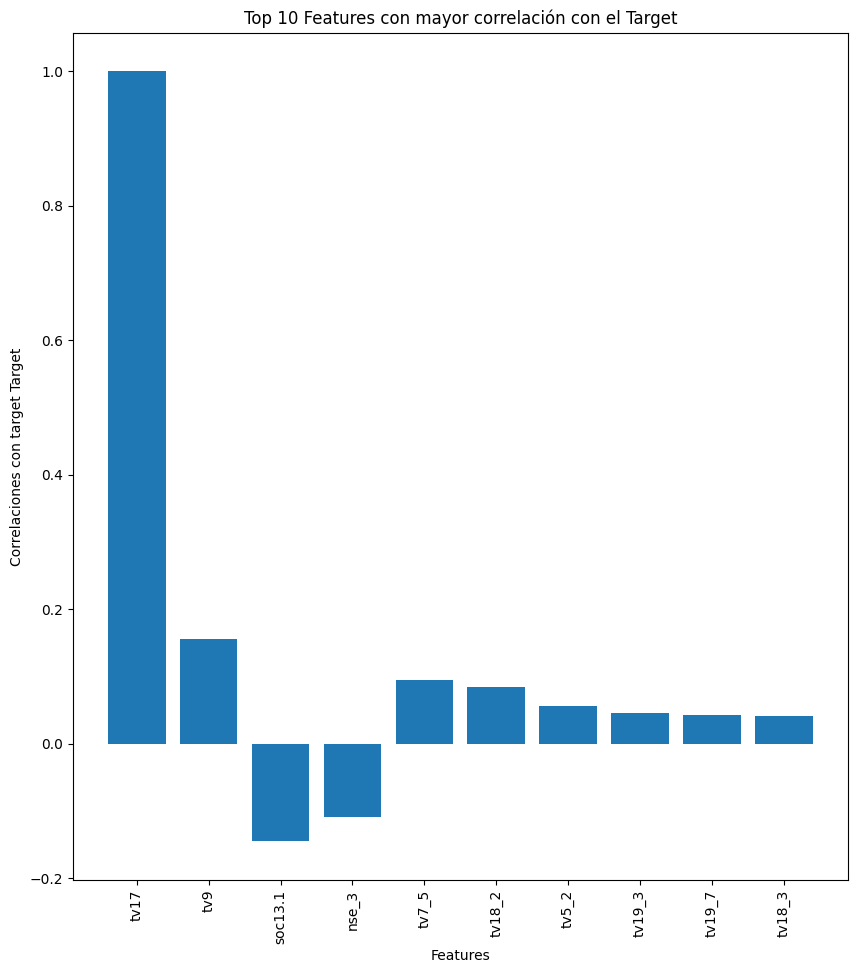

In [ ]:
#armamos un histograma
top_10_features = correlaciones.abs().nlargest(10).index
top_10_corr_values = correlaciones[top_10_features]

plt.figure(figsize=(10, 11))
plt.bar(top_10_features, top_10_corr_values)
plt.xlabel('Features')
plt.ylabel('Correlaciones con target Target')
plt.title('Top 10 Features con mayor correlación con el Target')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#ahora empieza el modelado
#definimos las variables train y text


X = df_ENCCseleccionado_features.drop('tv17', axis=1)
y =df_ENCCseleccionado_features['tv17']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91, stratify=y)

In [ ]:
#Generamos una función para entrenar, predecir y evaluar el modelo con diferentes métricas. todo todo copiado de la notebook de ramiro

def evaluate_model(model, X_train, X_test, y_train, y_test):
    #Entrenamiento del modelo
    model.fit(X_train, y_train)
    #Generamos predicciones con el modelo ya entrenado (guardado en model) usando las variables predictoras de test
    y_pred = model.predict(X_test)
    #Calculamos métricas comparando mi predicción de y de test contra los valores reales
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

    #Imprimimos resultados
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'AUC: {auc}')

    #Mi función va a devolver modelo y predicciones para poder guardar los objetos

    return model, y_pred

In [ ]:
#Decision tree

dt_model = DecisionTreeClassifier(random_state=42)
dt_model, dt_pred = evaluate_model(dt_model, X_train, X_test, y_train, y_test)

Accuracy: 0.5621301775147929
F1 Score: 0.4237479554141991
Precision: 0.6104850277927202
Recall: 0.5621301775147929
AUC: 0.6092061505107865


In [ ]:
#random forest

rf_model = RandomForestClassifier(random_state=42)
rf_model, rf_pred = evaluate_model(rf_model, X_train, X_test, y_train, y_test)

Accuracy: 0.5547337278106509
F1 Score: 0.43238176163117403
Precision: 0.45018161235658527
Recall: 0.5547337278106509
AUC: 0.5920479175781422


In [ ]:
#XGboost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model, xgb_pred = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

Accuracy: 0.5576923076923077
F1 Score: 0.4376240140625229
Precision: 0.47399786040952563
Recall: 0.5576923076923077
AUC: 0.5916631136412146


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:30:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
#armo una curva de roc para los 3 modelos. el que mejor performa es xgboost 0.57

plt.figure(figsize=(10, 8))

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test == i, y_pred_prob[:, i])

    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'{name} (class {i}) ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

IndexError: index 2 is out of bounds for axis 1 with size 2

<Figure size 1000x800 with 0 Axes>

In [ ]:
#ensamble con voting

voting_clf = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')

In [ ]:
voting_clf, voting_pred = evaluate_model(voting_clf, X_train, X_test, y_train, y_test)

Accuracy: 0.5636094674556213
F1 Score: 0.422332826226745
Precision: 0.5261830059950492
Recall: 0.5636094674556213
AUC: 0.6086553115728187


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [19:51:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


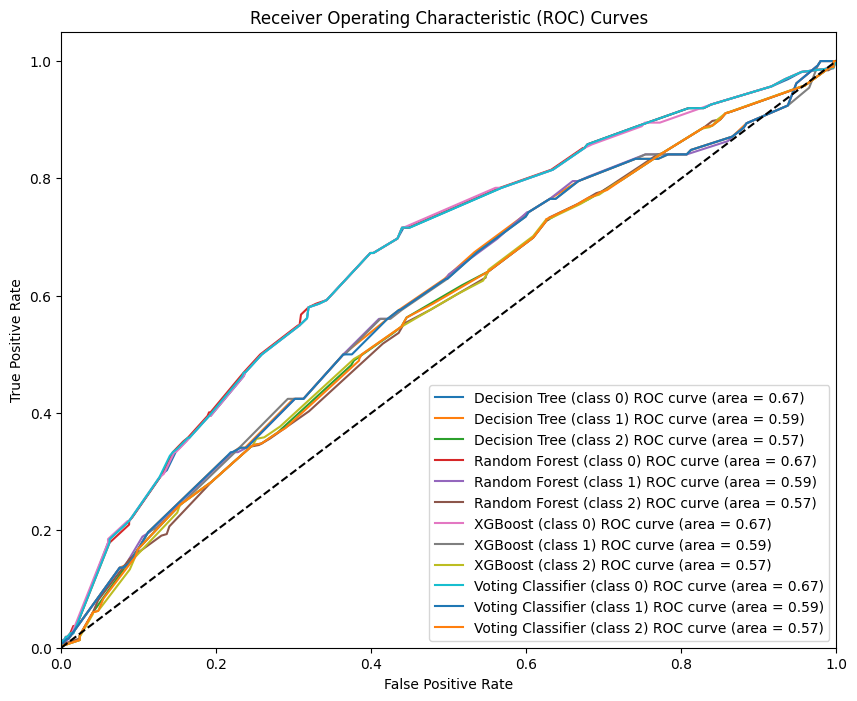

In [ ]:
# no mejora demasiado la curva
plt.figure(figsize=(10, 8))

models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'Voting Classifier': voting_clf
}

for name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test == i, y_pred_prob[:, i])

    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'{name} (class {i}) ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#convierto en dummies, como son todas de tipo int, no cambia nada


# Convertir las columnas en variables dummy
df_ENCCseleccionado_features_dicotomicas = (df_ENCCseleccionado_features > 0).astype(int)

# Mostrar las primeras filas de la nueva base
print(df_ENCCseleccionado_features_dicotomicas.head())

   nse_3  tv9  tv17  soc13.1
0      1    1     1        1
1      1    1     1        1
2      1    1     1        1
3      1    1     1        1
4      1    0     1        1


In [ ]:
#Tiene los datos de la variables predictoras para utilizar en la prueba.
X_test[:5]

,nse_3,tv9,soc13.1
1820,1,1,1
556,2,1,8
1420,2,1,3
1136,2,1,5
2380,2,1,3


In [ ]:
predicciones = model.predict(X_test)

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, predicciones))


[[  0  84  78]
 [  0 155 359]
 [  0   0   0]]


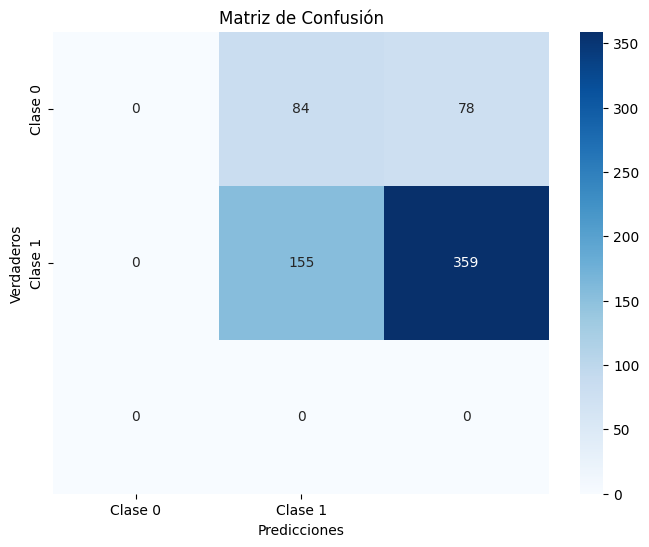

In [ ]:
# Observamos que el modelo es más propenso a confundirla con la clase 2; sobre la clase 1: Muy pocos casos se predijeron correctamente (solo 1 verdadero positivo).
# SObre la clase 2: El modelo parece tener un buen desempeño en esta clase, con muchos verdaderos positivos (375) y pocos falsos negativos.
#Visualizo la matriz de confusión

cm = confusion_matrix(y_test, predicciones)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 0', 'Clase 1'],  # Cambia los nombres según tus clases
            yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
#Comenzamos con los ajustes del modelo
X = df_ENCCseleccionado_features_dicotomicas.drop('tv17', axis=1)
y = df_ENCCseleccionado_features_dicotomicas['tv17']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=91, stratify=y)

In [ ]:
#Genero una función para entrenar, predecir y evaluar el modelo con diferentes métricas
#También vamos a incluir como parte de los ajustes, control sobre la clase desbalanceada

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Entrena, predice y evalúa un modelo con métricas.

    Args:
        model: El modelo a evaluar.
        X_train: Datos de entrenamiento.
        X_test: Datos de prueba.
        y_train: Etiquetas de entrenamiento.
        y_test: Etiquetas de prueba.

    Returns:
        model: El modelo entrenado.
        y_pred: Predicciones del modelo.
    """

    # Ajuste de los pesos de las clases si el modelo es XGBoost
    if isinstance(model, XGBClassifier):
        class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
        sample_weights = np.array([class_weights[i] for i in y_train])
    else:
        sample_weights = None

    # Entrenamiento del modelo
    model.fit(X_train, y_train, sample_weight=sample_weights)

    # Genero predicciones
    y_pred = model.predict(X_test)

    # Calculo métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    if len(np.unique(y_test)) > 1:  # Asegurarse de que haya más de una clase
        auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        auc = None

    # Imprimo resultados
    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'AUC: {auc}')

    return model, y_pred


In [ ]:
#XGBoost
from sklearn.utils.class_weight import compute_class_weight
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model, xgb_pred = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:33:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5576923076923077
F1 Score: 0.4376240140625229
Precision: 0.47399786040952563
Recall: 0.5576923076923077
AUC: 0.5916631136412146


In [ ]:
#Extraigo las reglas del XGBOOSTT: El árbol usa principalmente tres variables: grupos_edad, soc13.1 (nivel educativo) y nse_3 (nivel socioeconómico).

booster = xgb_model.get_booster()


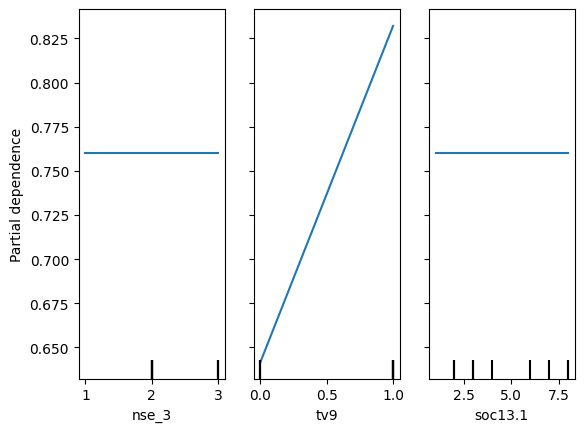

In [ ]:
# Crear el gráfico de dependencia parcial
features = list(range(min(5, X_train.shape[1])))  # Usa índices dentro del rango disponible  # índices de las características más importantes
target_class = 0 # tengo que especificar un target especifico para multiclase
PartialDependenceDisplay.from_estimator(dt_model, X_train, features, feature_names=feature_names, target=target_class, grid_resolution=10)
plt.show()

features = list(range(min(5, X_train.shape[1])))  # Usa índices dentro del rango disponible


In [ ]:
# Importancia de características en el modelo
dt_importance = pd.Series(dt_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# Importancia de características en el Random Forest
rf_importance = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# Importancia de características en XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=feature_names).sort_values(ascending=False)

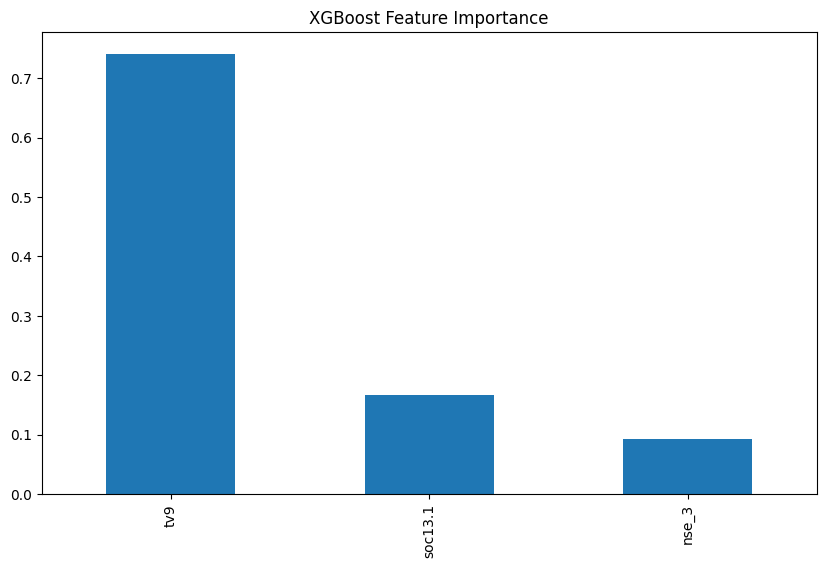

In [ ]:
num_features = 10


# Visualización para XGBoost
plt.figure(figsize=(10, 6))
xgb_importance[:num_features].plot(kind='bar', title='XGBoost Feature Importance')
plt.show()